# ORIE 4580/5580 Assignment 6

#### Students: Ryan Ren (yr269),Naiyuan Liu (nl535)

### Github link: https://github.coecis.cornell.edu/yr269/simulation_assignments/blob/main/HW6.ipynb


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

In [ ]:
import numpy as np

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.
$\mu=\int_{0}^{12} \frac{1}{56}\left(5t^3-90t^2+300t+1480\right)dt$

$P(X>250)=1-P(x\leq250)=1-∑_{k=0}^{250}\frac{μ^k}{k!}e^{-\mu}$

See code for calculation

In [ ]:
from scipy.integrate import quad
import scipy.stats as stats

def lambda_t(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)
mu, error = quad(lambda_t, 0, 12)
prob_more_than_250 = 1 - stats.poisson.cdf(250, mu)
print(f'The mean is {mu} and the probability the coffee store will see more than 250 customer is {prob_more_than_250}')

The mean is 239.99999999999994 and the probability the coffee store will see more than 250 customer is 0.24711253205956585


___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



In [ ]:
from scipy.optimize import minimize_scalar
max_rate_result = minimize_scalar(lambda t: -lambda_t(t), bounds=(0, 12), method='bounded')
lambda_max = -max_rate_result.fun
lambda_max

31.428571428571352

In [ ]:
num_replications = 500
num_hours = 12
num_customers_threshold = 250
num_customers_per_replication = []
hourly_arrivals_per_replication = [[0] * 12 for _ in range(num_replications)]
for i in range(num_replications):
    total_arrivals = np.random.poisson(lambda_max * num_hours)
    arrival_times = np.random.uniform(0, num_hours, total_arrivals)
    accepted_arrivals = 0
    for t in arrival_times:
        if np.random.uniform(0, 1) < lambda_t(t) / lambda_max:
            accepted_arrivals += 1
            hour_index = int(t)
            hourly_arrivals_per_replication[i][hour_index] += 1
    num_customers_per_replication.append(accepted_arrivals)

prob_more_than_250_estimated = sum(c > num_customers_threshold for c in num_customers_per_replication) / num_replications

mean = prob_more_than_250_estimated
std_error = np.std([c > num_customers_threshold for c in num_customers_per_replication]) / np.sqrt(num_replications)
confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std_error)

prob_more_than_250_estimated, confidence_interval

print(f'The estimated probability of customers exceeding 250 in 12 hours is {prob_more_than_250_estimated}, and the confidence interval is {confidence_interval}')

The estimated probability of customers exceeding 250 in 12 hours is 0.262, and the confidence interval is (0.22345731945663008, 0.3005426805433699)


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

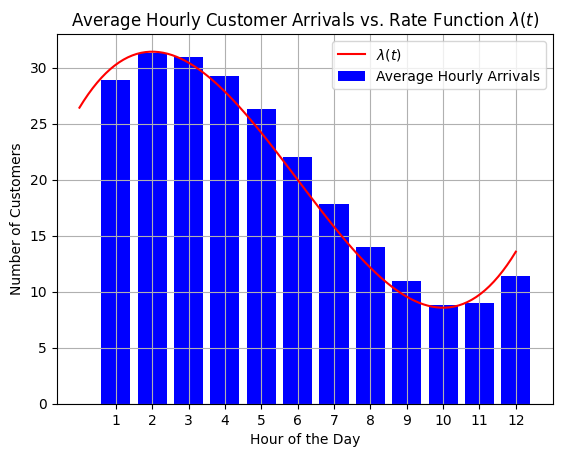

In [ ]:
import matplotlib.pyplot as plt
average_hourly_arrivals = [sum(hourly_arrivals[i] for hourly_arrivals in hourly_arrivals_per_replication) / num_replications for i in range(12)]

t_plot = np.linspace(0, 12, 100)
lambda_t_plot = [lambda_t(t) for t in t_plot]
plt.bar(range(1, 13), average_hourly_arrivals, color='blue', label='Average Hourly Arrivals')
plt.plot(t_plot, lambda_t_plot, color='red', label='$\lambda(t)$')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.title('Average Hourly Customer Arrivals vs. Rate Function $\lambda(t)$')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


In [ ]:
def simulate_song(n):
  output=[]
  for _ in range(5000):
    music_ls = [i for i in range(1,n+1)]
    count = 0
    while music_ls:
      play = np.random.randint(1,n+1)
      if play in music_ls:
        music_ls.remove(play)
      count += 1
    output.append(count)
  se = 1.97* (np.std(output) / np.sqrt(5000))
  mean = np.mean(output)
  return [mean-se,mean+se]


In [ ]:
for n in (10,20,30,40,50,60,70,80,90,100,200,300):
  print(f'The confidence interval to play {n} songs is {simulate_song(n)}')

The confidence interval to play 10 songs is [28.98425876398746, 29.60494123601254]
The confidence interval to play 20 songs is [71.87079882438992, 73.20280117561008]
The confidence interval to play 30 songs is [119.08452937381712, 121.14067062618288]
The confidence interval to play 40 songs is [169.44485992357482, 172.15914007642516]
The confidence interval to play 50 songs is [225.27600987290086, 228.75519012709916]
The confidence interval to play 60 songs is [278.19497772762736, 282.26422227237265]
The confidence interval to play 70 songs is [336.1610737087835, 341.04812629121653]
The confidence interval to play 80 songs is [393.80774343718537, 399.3630565628146]
The confidence interval to play 90 songs is [456.6514029683927, 463.1697970316073]
The confidence interval to play 100 songs is [515.5518799436572, 522.5737200563428]
The confidence interval to play 200 songs is [1163.7116840122617, 1177.8299159877383]
The confidence interval to play 300 songs is [1880.0223397250656, 1901.68

Given the results, we see that as n increases, the number of plays required to hear all songs also increases. The increase is not linear; it grows more slowly than n itself. This pattern possibly indicates a logarithmic relationship between the number of songs and the plays required.

___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



In [ ]:
def simulate_song_until_repeat(n):
  output = []
  for _ in range(5000):
    played_songs = set()
    count = 0
    while True:
      play = np.random.randint(1, n+1)
      count += 1
      if play in played_songs:
        break
      played_songs.add(play)
    output.append(count)
  se = 1.97 * (np.std(output) / np.sqrt(5000))
  mean = np.mean(output)
  return mean

In [ ]:
for n in (10,20,30,40,50,60,70,80,90,100,200,300,400):
  print(f'Average number ofsongs Sids son hears before he wakes up if the playlist include {n} songs is {simulate_song_until_repeat(n)}.')

Average number ofsongs Sids son hears before he wakes up if the playlist include 10 songs is 4.6576.
Average number ofsongs Sids son hears before he wakes up if the playlist include 20 songs is 6.3014.
Average number ofsongs Sids son hears before he wakes up if the playlist include 30 songs is 7.5468.
Average number ofsongs Sids son hears before he wakes up if the playlist include 40 songs is 8.6498.
Average number ofsongs Sids son hears before he wakes up if the playlist include 50 songs is 9.495.
Average number ofsongs Sids son hears before he wakes up if the playlist include 60 songs is 10.3528.
Average number ofsongs Sids son hears before he wakes up if the playlist include 70 songs is 11.168.
Average number ofsongs Sids son hears before he wakes up if the playlist include 80 songs is 11.9472.
Average number ofsongs Sids son hears before he wakes up if the playlist include 90 songs is 12.4902.
Average number ofsongs Sids son hears before he wakes up if the playlist include 100 song

___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

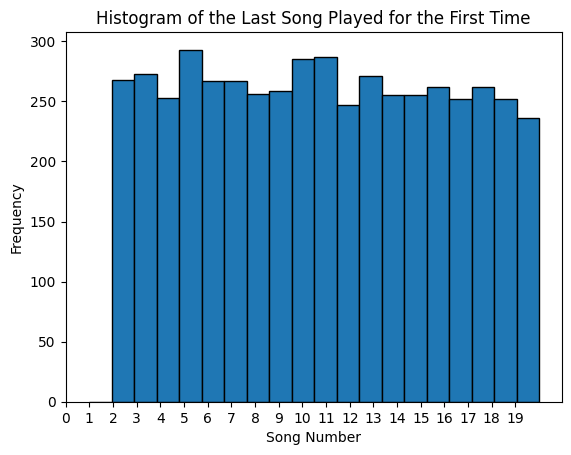

In [ ]:
def simulate_poor_randomizer(n, simulations=5000):
    last_songs = []
    for i in range(simulations):
        played_songs = set()
        current_song = 1
        played_songs.add(current_song)
        while len(played_songs) < n:
            if np.random.rand() < 0.5:
                current_song = (current_song + 1) % n
                if current_song==0:
                  current_song=20
            else:
                current_song = (current_song - 1) % n
                if current_song==0:
                  current_song=20
            played_songs.add(current_song)

        last_songs.append(current_song)

    return last_songs

n = 20
last_songs_played = simulate_poor_randomizer(n)

plt.hist(last_songs_played, bins=n, edgecolor='black', range=(1, n))
plt.xlabel('Song Number')
plt.ylabel('Frequency')
plt.title('Histogram of the Last Song Played for the First Time')
plt.xticks(np.arange(n))
plt.show()

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

In [ ]:
def simulate_game(a,b):
  while a!=0 and b!=0:
    if np.random.randint(0,2)==0:
      a -= 1
      b += 1
    else:
      a += 1
      b -= 1

  if b==0:
    return 1
  else:
    return 0

n = 100000
count = 0
for i in range(n):
  count += simulate_game(10,5)
count/n

0.66678

From simulation, we found out that the probability for player A to win is $\frac{a}{a+b}$.

In order to find this analytically, we first define $P(a,b)= \frac{1}{2} P(a-1,b+1)+ \frac{1}{2} P(a+1,b-1)$ as the probability player A will win. Also we know that $P(a,0)=1$ and $P(0,b)=0$.

$P(1,1) = \frac{1}{2} P(0,1)+ \frac{1}{2} p(1,0)=0+\frac{1}{2}=\frac{1}{1+1}$

$P(1,2) = \frac{1}{2} P(0,3)+\frac{1}{2} P(2,1)=\frac{1}{2} P(2,1)$

$P(2,1) = \frac{1}{2} P(1,2) + \frac{1}{2} P(3,0)=\frac{1}{2} P(1,2)+\frac{1}{2}$

So, we have $P(1,2)=\frac{1}{4}P(1,2)+\frac{1}{4}$.

By solving this equation for $P(1,2)$, we got $P(1,2)=\frac{1}{3}=\frac{1}{1+2}$

Therefore, without lose of generosity, we could say $P(a,b) = \frac{a}{a+b}$, which is identical with the result we got from simulation.


___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

In [ ]:
ls = []
for i in range(1,21):
  ls.append([10,i*5])

def simulate_game2(a,b):
  count = 0
  while a!=0 and b!=0:
    if np.random.randint(0,2)==0:
      a -= 1
      b += 1
    else:
      a += 1
      b -= 1
    count+=1

  return count



In [ ]:
for i in ls:
  output = []
  for _ in range(5000):
    output.append(simulate_game2(i[0],i[1]))
  print(i,np.mean(output))


[10, 5] 48.3098
[10, 10] 100.6456
[10, 15] 151.3468
[10, 20] 201.1508
[10, 25] 243.7588
[10, 30] 302.7048
[10, 35] 339.6328
[10, 40] 413.2008
[10, 45] 450.4526
[10, 50] 499.0736
[10, 55] 553.5226
[10, 60] 619.2272
[10, 65] 647.599
[10, 70] 704.3852
[10, 75] 741.3986
[10, 80] 818.1224
[10, 85] 852.6946
[10, 90] 923.7132
[10, 95] 956.4796
[10, 100] 1011.9584


We found out that the expected time is a*b.

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [ ]:
def count_num():
  t_0 = np.random.exponential(2,1)
  count = 0
  while True:
    x = np.random.exponential(2,1)
    count+=1
    if x>t_0:
      break
  return count

simulation = []
for i in range(100):
  simulation.append(count_num())

se = 1.96 * ((np.std(simulation) / np.sqrt(100)))
mean = np.mean(simulation)
CI = [mean-se,mean+se]
print(f"CI: {CI}")

CI: [0.31894180226594937, 13.64105819773405]


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


In [ ]:
ls_experiments = [100]
for i in range(1,21):
  ls_experiments.append(i*500)

CI_ls = []
def generate_ci(n):
  simulation = []
  for i in range(n):
    simulation.append(count_num())
  se = 1.97 * ((np.std(simulation) / np.sqrt(n)))
  mean = np.mean(simulation)
  CI = [mean-se,mean+se]
  return CI

for n in ls_experiments:
  CI_ls.append(generate_ci(n))


CI_ls


[[2.040554935990631, 4.819445064009369],
 [4.454277736490297, 8.909722263509703],
 [5.5953750186374505, 17.348624981362548],
 [2.5071043355159786, 15.095562331150688],
 [1.809644622317478, 31.17935537768252],
 [6.051495230104741, 13.28930476989526],
 [6.361550110862562, 13.108449889137436],
 [6.695204619846523, 14.25565252301062],
 [6.046938022645553, 15.338561977354448],
 [4.825761809017262, 42.0377937465383],
 [8.139319273135985, 22.814280726864016],
 [1.180288308519378, 32.517893509662436],
 [5.926788126221464, 8.47254520711187],
 [6.337245982651778, 9.67444632504053],
 [7.0547586310763695, 13.792098511780774],
 [7.780282264396357, 22.440517735603642],
 [7.108291845104447, 12.758458154895553],
 [4.173720668717451, 34.72980874304726],
 [4.840799755255116, 21.080311355855994],
 [7.852634618460733, 29.299786434170848],
 [6.283094044908486, 22.512705955091512]]

___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans.
Let $X_i$ be the be the first person who takes longer.

Because the exponential distribution is memoryless, the probability that any friend takes longer does not depend on how long you took. Also, each one's time is iid. Then, $P(T_i>T_0)=0.5$


 So:
$$
E[X_i]=(0.5)^i
$$
$$
E[N]=∑_{i=1}^∞E[X_i]=∑_{i=1}^∞(0.5)^i
$$
This is a geometric series that does not converge, thus the result approaches infinity.